#BERT MODEL FOR DISASTER TWEET CLASSIFICATION

In [169]:
import pandas as pd
df = pd.read_csv("/content/train (1).csv",encoding='ISO-8859-1')
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [170]:
df = df.drop(['id','location'],axis=1)
df.head()

,keyword,text,target
0,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [171]:
#to see if the dataset is balanced or not.
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [172]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [173]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [174]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [175]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [176]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text
    
df['clean_text'] =df['text'].apply(lambda x:preprocess_text(x) )
df['keyword'] = df['keyword'].fillna("")
df['clean_keyword'] = df['keyword'].apply(lambda x: preprocess_text(x) )
# Combine column 'clean_keyword' and 'clean_text' into one
df['keyword_text'] = df['clean_keyword'] + " " + df["clean_text"]






In [177]:
df.head()

,keyword,text,target,clean_text,clean_keyword,keyword_text
0,,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,,deed reason earthquake may allah forgive u
1,,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,,forest fire near la ronge sask canada
2,,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,,resident asked shelter place notified officer...
3,,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...,,13000 people receive wildfire evacuation orde...
4,,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,,got sent photo ruby alaska smoke wildfire pou...


In [178]:
print(df.iloc[[50]])

   keyword                                               text  target  \
50  ablaze  Deputies: Man shot before Brighton home set ab...       1   

                                  clean_text clean_keyword  \
50  deputy man shot brighton home set ablaze        ablaze   

                                       keyword_text  
50  ablaze deputy man shot brighton home set ablaze  


In [179]:
df=df.drop(['text','clean_text','clean_keyword'],axis=1)

In [180]:
df=df.drop(['keyword'],axis=1)

In [181]:
df.head()

,target,keyword_text
0,1,deed reason earthquake may allah forgive u
1,1,forest fire near la ronge sask canada
2,1,resident asked shelter place notified officer...
3,1,13000 people receive wildfire evacuation orde...
4,1,got sent photo ruby alaska smoke wildfire pou...


In [182]:
X_train=df['keyword_text']
X_train

0              deed reason earthquake may allah forgive u
1                   forest fire near la ronge sask canada
2        resident asked shelter place notified officer...
3        13000 people receive wildfire evacuation orde...
4        got sent photo ruby alaska smoke wildfire pou...
                              ...                        
7608     two giant crane holding bridge collapse nearb...
7609     ariaahrary thetawniest control wild fire cali...
7610                      m194 0104 utc5km volcano hawaii
7611     police investigating ebike collided car littl...
7612     latest home razed northern california wildfir...
Name: keyword_text, Length: 7613, dtype: object

In [183]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [184]:
X_train

0              deed reason earthquake may allah forgive u
1                   forest fire near la ronge sask canada
2        resident asked shelter place notified officer...
3        13000 people receive wildfire evacuation orde...
4        got sent photo ruby alaska smoke wildfire pou...
                              ...                        
7608     two giant crane holding bridge collapse nearb...
7609     ariaahrary thetawniest control wild fire cali...
7610                      m194 0104 utc5km volcano hawaii
7611     police investigating ebike collided car littl...
7612     latest home razed northern california wildfir...
Name: keyword_text, Length: 7613, dtype: object

In [185]:
y_train=df['target']
y_train

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['keyword_text'],df['target'], stratify=df['target'],test_size=0.20)

In [188]:
#pip install tensorflow-text==2.11.0

In [189]:
#BERT Preprocessor & Encoder
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [190]:
#downloading the BERT preprocessor and encoder.
preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [191]:
#model using bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text-layer')
preprocessed_text = preprocess(text_input)
outputs = encoder(preprocessed_text)
d_layer = tf.keras.layers.Dropout(0.1, name="dropout-layer")(outputs['pooled_output'])
d_layer = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(d_layer)
model = tf.keras.Model(inputs=[text_input], outputs = [d_layer])

In [192]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text-layer (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 keras_layer_6 (KerasLayer)     {'input_word_ids':   0           ['text-layer[0][0]']             
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [193]:
m= [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
      
]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=m)

In [194]:
history=model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))
#model.evaluate(X_test, y_test)

Epoch 1/10
191/191 [==============================] - 141s 441ms/step - loss: 0.6384 - accuracy: 0.6373 - precision: 0.6277 - recall: 0.3833 - val_loss: 0.5852 - val_accuracy: 0.7183 - val_precision: 0.8169 - val_recall: 0.4434
Epoch 2/10
191/191 [==============================] - 86s 449ms/step - loss: 0.5866 - accuracy: 0.7059 - precision: 0.7028 - recall: 0.5468 - val_loss: 0.5564 - val_accuracy: 0.7466 - val_precision: 0.7081 - val_recall: 0.6972
Epoch 3/10
191/191 [==============================] - 81s 423ms/step - loss: 0.5588 - accuracy: 0.7292 - precision: 0.7212 - recall: 0.6030 - val_loss: 0.5339 - val_accuracy: 0.7722 - val_precision: 0.8218 - val_recall: 0.5994
Epoch 4/10
191/191 [==============================] - 81s 425ms/step - loss: 0.5495 - accuracy: 0.7374 - precision: 0.7337 - recall: 0.6106 - val_loss: 0.5212 - val_accuracy: 0.7761 - val_precision: 0.8039 - val_recall: 0.6330
Epoch 5/10
191/191 [==============================] - 85s 448ms/step - loss: 0.5410 - accur

In [195]:
model.evaluate(X_test, y_test)

48/48 [==============================] - 17s 342ms/step - loss: 0.4955 - accuracy: 0.7833 - precision: 0.7832 - recall: 0.6850


[0.4955141842365265,
 0.7833223938941956,
 0.7832167744636536,
 0.6850152611732483]

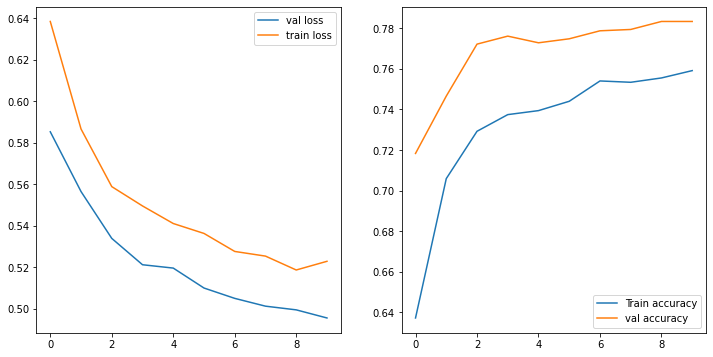

In [197]:
from matplotlib import pyplot as plt

plt.figure(1, figsize=(12, 6))

plt.subplot(121)
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['loss'], label='train loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()

plt.show()

In [198]:
import numpy as np
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_predicted)
matrix


48/48 [==============================] - 18s 365ms/step


array([[745, 124],
       [206, 448]])

In [199]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       869
           1       0.78      0.69      0.73       654

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523



In [200]:
#Predicteing competition one
df1 = pd.read_csv("/content/test (1).csv",encoding='ISO-8859-1')
df1.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [201]:
df1= df1.drop(['id','location'],axis=1)
df1.head()

,keyword,text
0,NaN,Just happened a terrible car crash
1,NaN,"Heard about #earthquake is different cities, s..."
2,NaN,"there is a forest fire at spot pond, geese are..."
3,NaN,Apocalypse lighting. #Spokane #wildfires
4,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [202]:
df1['clean_text'] =df1['text'].apply(lambda x:preprocess_text(x) )
df1['keyword'] = df1['keyword'].fillna("")
df1['clean_keyword'] = df1['keyword'].apply(lambda x: preprocess_text(x) )
# Combine column 'clean_keyword' and 'clean_text' into one
df1['keyword_text'] = df1['clean_keyword'] + " " + df1["clean_text"]



In [203]:
df1.head()

,keyword,text,clean_text,clean_keyword,keyword_text
0,,Just happened a terrible car crash,happened terrible car crash,,happened terrible car crash
1,,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...,,heard earthquake different city stay safe eve...
2,,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...,,forest fire spot pond goose fleeing across st...
3,,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire,,apocalypse lighting spokane wildfire
4,,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill 28 china taiwan,,typhoon soudelor kill 28 china taiwan


In [204]:
df1=df1.drop(['text','clean_text','clean_keyword'],axis=1)

In [205]:
df1.head()

,keyword,keyword_text
0,,happened terrible car crash
1,,heard earthquake different city stay safe eve...
2,,forest fire spot pond goose fleeing across st...
3,,apocalypse lighting spokane wildfire
4,,typhoon soudelor kill 28 china taiwan


In [206]:

df1.rename(columns = {'keyword_text':'text'}, inplace = True)
df1.head()

,keyword,text
0,,happened terrible car crash
1,,heard earthquake different city stay safe eve...
2,,forest fire spot pond goose fleeing across st...
3,,apocalypse lighting spokane wildfire
4,,typhoon soudelor kill 28 china taiwan


In [207]:
y_predicted1 = model.predict(df1['text'])
y_predicted1 = y_predicted1.flatten()
y_predicted1 = np.where(y_predicted1 > 0.5, 1, 0)

102/102 [==============================] - 35s 348ms/step


In [208]:
y_predicted1

array([1, 1, 1, ..., 1, 1, 1])

In [209]:
import csv

# define the list of values to write to the CSV file
#my_list = ['value1', 'value2', 'value3']

# define the name of the CSV file and the column to write to
csv_file = 'testanswer10.csv'
column_name = 'target'

# open the CSV file for writing and create a csv.writer object
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)

    # write the column name as the first row
    writer.writerow([column_name])

    # write the values from the list to the specified column
    for value in y_predicted1:
        writer.writerow([value])
